In [120]:
from IPython.display import HTML
HTML('''
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
''')

<center><img src="PH_StormSat.PNG"/></center>

***
<a name="top"></a>
#### Table of Contents:

[ref0]: #exec_summary
- [Executive Summary][ref0]

[ref1]: #prob_stat
- [Problem Statement][ref1]

[ref3]: #motiv
- [Motivation][ref3]

[ref4]: #dat_sor
- [Data Source][ref4]

[ref5]: #met
- [Methodology][ref5]

[ref6]: #dat_expl
- [Data Exploration][ref6]

[ref7]: #dat_prep
- [Data Preprocessing][ref7]

[ref8]: #clus_freq
- [Data Analysis][ref8]

[ref81]: #clus
- [Clustering Implementaion][ref81]

[ref82]: #freq
- [Frequent Itemset Analysis Implementation][ref82]

[ref9]: #conc
- [Conclusion and Insights][ref9]

[ref10]: #reco
- [Recommendations][ref10]

[ref11]: #refe
- [References][ref11]

***

In [162]:
from DMW_final import *

fl = FigureLabeler();
pd.options.mode.chained_assignment = None

<a name="exec_summary"></a>
<h2 style=" color: #045a63">Executive Summary</h2>

***
This paper explores the aid efforts of various organizations in response to Typhoon Odette, which struck the Philippines in 2013 causing widespread destruction and loss of life. The study aims to examine the strategies, challenges, and impact of these aid organizations and provide insights into effective disaster relief strategies. The "Typhoon Rai (Odette) 3W" dataset created by the Humanitarian Data Exchange (HDX) was used as the primary data source, containing detailed information on the types and levels of aid provided, along with implementation modalities and the number of people reached. Clustering techniques and frequent itemset analysis were applied to the dataset, providing valuable insights into the response efforts of aid organizations, including their strengths and weaknesses. The analysis revealed three clusters: Response, Recovery, and Rehabilitation, which follow a chronological order of importance of assistance over the course of a disaster. The study highlights the importance of effective disaster relief strategies and the critical role played by aid organizations in mitigating the impact of natural disasters and supporting recovery efforts.

Through frequent itemset analysis, the researchers was able to identify the most crucial types of aid, namely SHELTER and WASH, and recommend that relief organizations provide more of these types of aid to aided and underserved areas. The researchers also recommend reallocating excess aid to the nearest and most populous underserved provinces. The committee suggests that the analysis can be further strengthened by including additional data on the extent of damage caused by the disaster and by developing a location strategy tool that can help organizations identify the areas that require the most assistance and allocate resources accordingly. By implementing a centralized relief operation with the help of this tool, organizations can avoid redundant activities and ensure that resources are allocated in a systematic and strategic manner, making relief efforts more effective and efficient.

[ref]: #top
[Back to Table of Contents][ref]

<a name="prob_stat"></a>
<h2 style=" color: #045a63">Problem Statement</h2>

***
In October 2013, Typhoon Odette (international name: Rai) struck the Philippines, causing widespread destruction and loss of life. The typhoon brought heavy rains, strong winds, and storm surges, causing landslides and flooding in several regions of the country. In the aftermath of the disaster, various organizations stepped up to provide aid to the affected communities. This paper seeks to explore how these organizations provided aid to the Philippines during Typhoon Odette, examining their strategies, challenges, and impact. By analyzing the response efforts of these organizations, we can gain insights into effective disaster relief strategies and identify areas for improvement in future relief efforts.

[ref]: #top
[Back to Table of Contents][ref]

<a name="motiv"></a>
<h2 style=" color: #045a63">Movivation</h2>

***
Natural disasters can have devastating effects on communities, causing loss of life, displacement, and destruction of infrastructure. In the case of Typhoon Odette in the Philippines, the disaster caused significant damage to homes, crops, and livelihoods, leaving many vulnerable to further hardship. However, in the aftermath of a disaster, the response of aid organizations can play a crucial role in mitigating the impact and aiding in recovery efforts. Studying how these organizations provided aid during Typhoon Odette can provide valuable insights into effective disaster relief strategies, including the types of aid provided, how aid was delivered, and the challenges and successes encountered. This information can inform future disaster response efforts, helping to improve the effectiveness of aid and ultimately support the recovery and resilience of affected communities.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_sor"></a>
<h2 style=" color: #045a63">Data Source</h2>

***
In response, humanitarian organizations provided aid to affected communities, with efforts documented in the "Typhoon Rai (Odette) 3W" dataset created by the Humanitarian Data Exchange (HDX) that can be found at https://data.humdata.org/dataset/typhoon-rai-odette-3w. This dataset provides detailed information on the aid efforts of various organizations, including their types and levels of support, down to the barangay level. The dataset contains information on critical support, such as shelter, food, and medical assistance, along with implementation modalities and the number of people reached. In order to better understand the relationships between relief organizations and the locations assisted, clustering techniques and frequent itemset analysis will be applied to the dataset. By analyzing this data, we can gain valuable insights into the response efforts of aid organizations, including their strengths and weaknesses, which can inform future disaster response and relief efforts

In [163]:
odette_df = (
    pd.read_excel('220702_3w-typhoon-rai_odette-consolidated-hdx.xlsx',
                  header=1)
)

fl.table_caption("Typhoon Odette DataFrame",
                 "Preview of the dataset to be worked on this Analysis")
display(HTML(odette_df.head().to_html(index=False)))

ORGANIZATION,ACRONYM,ORG_TYPE,PARTNER,DONOR,CLUSTER (select from the list),SUB-CLUSTER (select from the list),REGION,PROVINCE,CITY/ MUNICIPALITY,BARANGAY,EVACUATION SITE,CLUSTER ACTIVITY,ACTIVITY DESCRIPTION (short specific activity description),IMPLEMENTATION MODALITY (select from the list),CASH MODALITY (if cash assistance),NUMBER OF PEOPLE REACHED (Individuals),"ACTIVITY STATUS (ONGOING, COMPLETED, PLANNED)",ACTIVITY START DATE,ACTIVITY END DATE,REMARKS,Region Code,Province Code,Mun_City_Code,Mun,Pro
Philippine Red Cross,PRC,Red Cross,AKRHO,AKRHO,Health,Health,Region VII (Central Visayas),Negros Oriental,Dumaguete City (Capital),Poblacion 4,Chapter Office,Emergency health services,Allocation of Blood (Units) to Hospital,In-kind,NaN,25,Completed,NaN,NaN,25 individuals,PH070000000,PH074600000,PH074610000,Region VII (Central Visayas)Negros OrientalDumaguete City (Capital),Region VII (Central Visayas)Negros Oriental
Philippine Red Cross,PRC,Red Cross,American Red Cross,American Red Cross,Shelter,Shelter,Region VIII (Eastern Visayas),Southern Leyte,SOGOD,HIBOD-HIBOD,Municipal Plaza,Distribution of building materials,Distribution of CGI Sheets,In-kind,NaN,10,Completed,2022-03-08 00:00:00,2022-03-08 00:00:00,10 families,PH080000000,PH086400000,PH086417000,Region VIII (Eastern Visayas)Southern LeyteSOGOD,Region VIII (Eastern Visayas)Southern Leyte
Philippine Red Cross,PRC,Red Cross,American Red Cross,American Red Cross,Shelter,Shelter,Region VIII (Eastern Visayas),Southern Leyte,SOGOD,KAHUPIAN,Municipal Plaza,Distribution of building materials,Distribution of CGI Sheets,In-kind,NaN,20,Completed,2022-03-08 00:00:00,2022-03-08 00:00:00,20 families,PH080000000,PH086400000,PH086417000,Region VIII (Eastern Visayas)Southern LeyteSOGOD,Region VIII (Eastern Visayas)Southern Leyte
Philippine Red Cross,PRC,Red Cross,American Red Cross,American Red Cross,Shelter,Shelter,Region VIII (Eastern Visayas),Southern Leyte,SOGOD,KANANGKAAN,Municipal Plaza,Distribution of building materials,Distribution of CGI Sheets,In-kind,NaN,25,Completed,2022-03-08 00:00:00,2022-03-08 00:00:00,25 families,PH080000000,PH086400000,PH086417000,Region VIII (Eastern Visayas)Southern LeyteSOGOD,Region VIII (Eastern Visayas)Southern Leyte
Philippine Red Cross,PRC,Red Cross,American Red Cross,American Red Cross,Shelter,Shelter,Region VIII (Eastern Visayas),Southern Leyte,SOGOD,SAN ISIDRO,Municipal Plaza,Distribution of building materials,Distribution of CGI Sheets,In-kind,NaN,25,Completed,2022-03-08 00:00:00,2022-03-08 00:00:00,25 families,PH080000000,PH086400000,PH086417000,Region VIII (Eastern Visayas)Southern LeyteSOGOD,Region VIII (Eastern Visayas)Southern Leyte


The Odette dataframe as seen on table 1 is further described on the description table below where the different data types, variable categories and descriptions can be seen to be used as a reference in later sections of this study.

<center><b>Odette Response Dataset Description</b></center>

|Variable Name|Data type|Variable category|Description
|:---|:---|:---|:---|
|ORGANIZATION|character|categorical|Organization that conducted the relief operation
|ACRONYM|character|categorical|Acronym of the organization
|ORG_TYPE|character|categorical|Organization type
|PARTNER|character|categorical|Partner of the organization that conducted the relief operation
|DONOR|character|categorical|Donor to the organization to conduct the relief operation
|CLUSTER (select from the list)|character|categorical|Nature of the support provided
|SUB-CLUSTER (select from the list)|character|categorical|Detail of the nature of support
|REGION|character|categorical|Region where the operations took place
|PROVINCE|character|categorical|Province where the operations took place
|CITY/ MUNICIPALITY|character|categorical|City or Municipality where the operations took place
|BARANGAY|character|categorical|Barangay where the operations took place
|EVACUATION SITE|character|categorical|Evacuation site where the operations took place
|CLUSTER ACTIVITY|character|categorical|Nature of the activity conducted
|ACTIVITY DESCRIPTION (short specific activity description)|character|categorical|Short specific activity description
|IMPLEMENTATION MODALITY (select from the list)|character|categorical|Implementation mode of the operation
|CASH MODALITY (if cash assistance)|character|categorical|If cash assistance
|NUMBER OF PEOPLE REACHED (Individuals)|numerical|discrete|Count of individuals reached
|ACTIVITY STATUS \n(ONGOING, COMPLETED, PLANNED)|character|categorical|Status of the activity conducted
|ACTIVITY START DATE|numerical|categorical|Start date of the activity conducted
|ACTIVITY END DATE|numerical|categorical|End date of the activity conducted
|REMARKS|character|categorical|Detail of the count of individuals reached
|Region Code|character|categorical|Region code where the operations took place
|Province Code|character|categorical|Province code where the operations took place
|Mun_City_Code|character|categorical|Municipality code where the operations took place
|Mun|character|categorical|Municipality Detail of where the operations took place
|Pro|character|categorical|Province Detail of where the operations took place

[ref]: #top
[Back to Table of Contents][ref]

<a name="met"></a>
<h2 style=" color: #045a63">Methodology</h2>

***
Our methodology consists of five essential steps to analyze data efficiently. The first step is data exploration, where we gain insights into the data by understanding its characteristics and identifying any outliers or anomalies. The second step is data preprocessing, where we clean, transform, and prepare the data for analysis. The third step involves clustering implementation and frequent itemset analysis, where we group similar data points and identify frequent patterns within the data. The fourth step is to draw conclusions and insights from the results obtained in the previous steps. Finally, we provide recommendations based on the insights gained to support informed decision-making. By following this methodology, we can ensure that we obtain accurate results and insights from the data while ensuring its relevance and significance. These steps are to be discussed further on later sections of the study.

<center><img src="methodology.png"/></center>

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_expl"></a>
<h2 style=" color: #045a63">Data Exploration</h2>

***
The first step in our methodology is data exploration. This step involves gaining an understanding of the data and its characteristics. We analyze the distribution of variables and their relationships to identify any patterns or trends. This step also helps us to identify any outliers or anomalies that may affect our analysis. By exploring the data, we can ensure that we have a clear understanding of the data and its potential limitations.

In [164]:
# Total Samples
print(f'The Total Number of Samples for the Typhoon Odette Dataset:    '
      f'{len(odette_df)}' )

The Total Number of Samples for the Typhoon Odette Dataset:    14213


In [165]:
# Total Features
print(f'The Total Number of Features for the Typhoon Odette Dataset:    '
      f'{len(odette_df.columns)}')

The Total Number of Features for the Typhoon Odette Dataset:    26


In [166]:
# Total Categorical Features and Total Numerical Features
num_features, cat_features = get_cat_num_df(odette_df)
print(f'The Total Number of Categorical Features for the'
      f'Typhoon Odette Dataset: {len(cat_features)}')
print(f'The Total Number of Numerical Features for the '
      f'Typhoon Odette Dataset:   {len(num_features)}')

The Total Number of Categorical Features for theTyphoon Odette Dataset: 26
The Total Number of Numerical Features for the Typhoon Odette Dataset:   0


In [167]:
# Null Values DataFrame
null_df = get_null_df(odette_df)
out_null = null_df.sort_values(by='%', ascending=False).head(10)

fl.table_caption("Nulls DataFrame", "We can observe that there are multiple "
             "columns that contains a high percentage of NaNs")
display(HTML(out_null.to_html(index=True)))

,Column,Type,Total NaN,%
12,CASH MODALITY (if cash assistance),Categorical,13153,92.542039
4,SUB-CLUSTER (select from the list),Categorical,7635,53.718427
8,EVACUATION SITE,Categorical,7495,52.733413
17,REMARKS,Categorical,7235,50.904102
2,PARTNER,Categorical,4580,32.224020
13,NUMBER OF PEOPLE REACHED (Individuals),Categorical,3847,27.066770
7,BARANGAY,Categorical,2932,20.629002
11,IMPLEMENTATION MODALITY (select from the list),Categorical,2930,20.614930
3,DONOR,Categorical,2541,17.877999
20,Mun_City_Code,Categorical,1979,13.923873


Our initial investigation showed that we have 14213 rows and 26 columns of data. However, the types showed that all columns are categorical and it doesn't match what we know about the dataset where the number of individuals reached should be numerical and discrete and alike. We can also notice that there are a lot of columns that contains a high percentage of NaNs. From these we know that we have to perform data-preprocessing on our data and evaluate whether some of the columns should be dropped, imputed, or retained.

#### Exploratory Data Analysis of the Odette Dataset
In this section we are going to define research questions to guide us in exploring our data. The research questions are as follows:
- Which organizations conducted the most number of activities/relief operations?
- Who are the top donors that supported the operations for the Typhoon Odette response?
- Which nature of activities are most conducted for the Typhoon Odette response?
- Which regions received the most support?
- From the top regions, which provinces received the most support?

To ensure that we are going to capture the features in our EDA without duplicate, we are going to capitalize the strings for each categorical features that we will be working with.

In [168]:
# process the odette 
make_upper(odette_df)

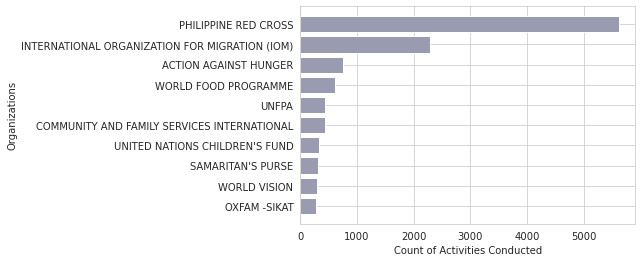

In [169]:
plt.barh(
    odette_df['ORGANIZATION'].value_counts().head(10).keys(),
    odette_df['ORGANIZATION'].value_counts().head(10).values,
    color='#999BB0'
)
plt.gca().invert_yaxis()
plt.xlabel('Count of Activities Conducted')
plt.ylabel('Organizations')
plt.show()

fl.fig_caption("Top Organizations for Typhoon Odette Response",
            "Comparison of the different organizations and the number"
           " of activities conducted for Typhoon Odette Response")

We can observe that the Philippine Red Cross conducted the most number of activities followed by IOM. The Philippine Red Cross (PRC) plays a crucial role in disaster relief operations and is evident as seen on Figure 1. As a humanitarian organization, the PRC is committed to providing aid and assistance to individuals and communities affected by disasters, whether natural or man-made.

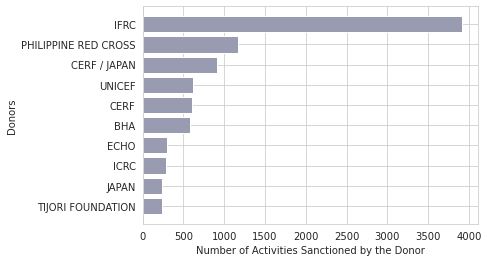

In [170]:
odette_df['DONOR'].value_counts().head(10)

plt.barh(
    odette_df['DONOR'].value_counts().head(10).keys(),
    odette_df['DONOR'].value_counts().head(10).values,
    color='#999BB0'
)
plt.gca().invert_yaxis()
plt.xlabel('Number of Activities Sanctioned by the Donor')
plt.ylabel('Donors')
plt.show()

fl.fig_caption("Top Donors that supported the Typhoon Odette Response",
            "Ranked by the number of activities supported by the Donor")

The IFRC or the International Federation of Red Cross and Red Crescent Societies is a worldwide humanitarian aid organization is the top donor for the typhoon Odette response operations.

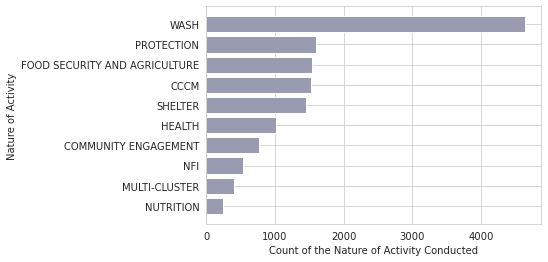

In [171]:
plt.barh(
    (odette_df['CLUSTER (select from the list)']
    .value_counts().head(10).keys()),
    (odette_df['CLUSTER (select from the list)']
    .value_counts().head(10).values),
    color='#999BB0'
)
plt.gca().invert_yaxis()
plt.xlabel('Count of the Nature of Activity Conducted')
plt.ylabel('Nature of Activity')
plt.show()

fl.fig_caption("Top Activities Conducted for the Typhoon Odette Operations",
            "Nature of Activities Conducted Ranked by the Number of"
           " times it was conducted")

Water, sanitation and hygiene or WASH is the type of support provided the most for the typhoon Odette response. During natural disasters or emergencies, access to safe water sources is often disrupted, leading to widespread water shortages and contamination of existing sources. This can lead to the spread of waterborne diseases, such as cholera, typhoid, and diarrhea, which can quickly become deadly in areas with limited access to healthcare.

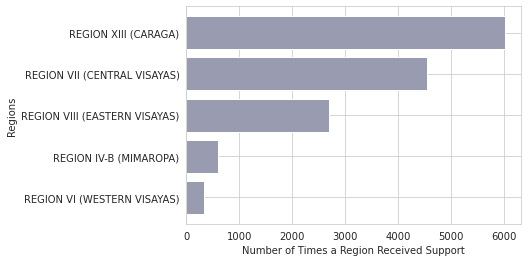

In [172]:
plt.barh(
    odette_df['REGION'].value_counts().head(5).keys(),
    odette_df['REGION'].value_counts().head(5).values,
    color='#999BB0'
)
plt.gca().invert_yaxis()
plt.xlabel('Number of Times a Region Received Support')
plt.ylabel('Regions')
plt.show()

fl.fig_caption("Top Regions that Received Assistance after Typhoon Odette",
            "Ranked by the number of times a region received assistance"
           " as part of the Typhoon Odette Response")

On the 16th of December 2021, Typhoon Odette made its first landfall in the Siargao Islands of Surigao Del Norte in Caraga. Within hours of its impact, a total of 2,552,312 families across 38 provinces have been affected as the typhoon had incurred massive damages in infrastructure, houses, and livelihoods that have severe and long-term effects on the affected populations. These findings are evident on why Region 8 received the most number of assistance after typhoon Odette.

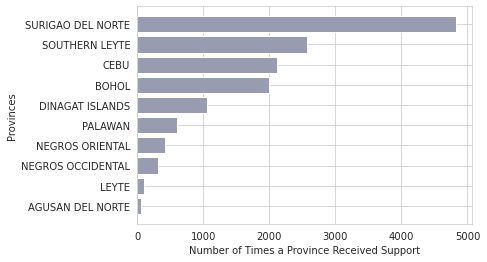

In [173]:
plt.barh(
    odette_df['PROVINCE'].value_counts().head(10).keys(),
    odette_df['PROVINCE'].value_counts().head(10).values,
    color='#999BB0'
)
plt.gca().invert_yaxis()
plt.xlabel('Number of Times a Province Received Support')
plt.ylabel('Provinces')
plt.show()

fl.fig_caption("Top Provinces that Received Assistance after Typhoon Odette",
            "Ranked by the number of times a province received assistance"
           " as part of the Typhoon Odette Response")

From previous findings on which region received the most support, Surigao Del Norte that is part of Region VIII contributed the most on why it is the most supported region for the typhoon Odette Response.

[ref]: #top
[Back to Table of Contents][ref]

<a name="dat_prep"></a>
<h2 style=" color: #045a63">Data Preprocessing</h2>

***
The second step in our methodology is data preprocessing. In this step, we clean the data and remove any irrelevant or redundant information. We also handle missing values and data inconsistencies that may affect the accuracy of our analysis. By transforming the data into a suitable format for analysis, we can ensure that we obtain accurate results and insights from the data.

<h4 style=" color: #045a63">Clustering Preparation</h4>
In preparation of the clustering, we are going to transform our dataframe to a clustering dataframe. Working with the dataset, feature engineering was performed to retrieve the new features below for the final clustering DataFrame.

<!-- 
* average length of activity
* % of efforts that are cluster x (for all cluster types)
* % of efforts that are subcluster x (for all subcluster types)
* % of efforts planned (As of collection of data)
* % of efforts ongoing (As of collection of data)
* % of efforts completed (As of collection of data)
* total number of people reached (individuals)
* average number of people reached per area (individuals)
* % of efforts that are activity description x (for top 30) -->

* The % of total effort that has been performed in the following clusters:
    * CCCM
    * COMMUNITY ENGAGEMENT
    * COORDINATION
    * EARLY RECOVERY
    * EDUCATION
    * EMERGENCY TELECOM
    * FOOD SECURITY AND AGRICULTURE
    * HEALTH
    * LIVELIHOOD
    * LOGISTICS
    * MULTI-CLUSTER
    * NFI
    * NUTRITION
    * PROTECTION
    * SHELTER
    * WASH

In [174]:
# % of efforts that are cluster x (for all cluster types)

odette_processed = odette_df[
    ['ORGANIZATION', 'DONOR', 'CLUSTER (select from the list)',
     'REGION', 'PROVINCE', 'CITY/ MUNICIPALITY', 'BARANGAY',
     'EVACUATION SITE', 'CLUSTER ACTIVITY',
     'ACTIVITY DESCRIPTION (short specific activity description)',
     'NUMBER OF PEOPLE REACHED (Individuals)', ' ACTIVITY START DATE',
     'ACTIVITY END DATE', 'ACTIVITY STATUS \n(ONGOING, COMPLETED, PLANNED)',
     'CASH MODALITY (if cash assistance)']
]

eocx_clusters = (
    odette_processed.groupby(['ORGANIZATION'])
    ['CLUSTER (select from the list)'].value_counts()
    .reset_index(name='Count')
)
t_e = (
    odette_processed.ORGANIZATION
    .value_counts().reset_index(name='Total_Efforts')
)
t_e.rename(columns={"index": "ORGANIZATION"}, inplace=True)

df_eocx = eocx_clusters.merge(t_e, on='ORGANIZATION')
df_eocx['%Efforts_clus'] = df_eocx['Count'] / df_eocx['Total_Efforts']

df_pv1 = df_eocx.pivot(index='ORGANIZATION',
                       columns='CLUSTER (select from the list)',
                       values='%Efforts_clus')
df_pv1.fillna(0, inplace=True)

fl.table_caption("Nature of Activity and Total Number of Activities",
              "Percentage of the nature of activity over the total"
                 " number of activities")
display(HTML(df_pv1.head().to_html(index=True)))

CLUSTER (select from the list),CCCM,COMMUNITY ENGAGEMENT,COORDINATION,EARLY RECOVERY,EDUCATION,EMERGENCY TELECOM,FOOD SECURITY AND AGRICULTURE,HEALTH,LIVELIHOOD,LOGISTICS,MULTI-CLUSTER,NFI,NUTRITION,PROTECTION,SHELTER,WASH
ORGANIZATION,,,,,,,,,,,,,,,,
"ABS-CBN FOUNDATION, INC. - BANTAY BATA 163",0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.00000,0.000000
ABSCBN FOUNDATION INC - BANTAY BATA 163,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.00000,0.000000
ACCORD,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.00000,0.000000
ACTED,0.0,0.147059,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.852941
ACTION AGAINST HUNGER,0.0,0.000000,0.0,0.0,0.0,0.0,0.365591,0.020161,0.0,0.001344,0.0,0.0,0.0,0.022849,0.09543,0.494624


After performing feature engineering on the dataset, we resulted in a sparse dataframe that requires us to perform singular vector decomposition and investigate  what number of components should be used while retaining at least 75% of the cummulative varaince explained. Dimensionality reduction will be performed in the later part of the study for clustering implementation.

<h4 style=" color: #045a63">Frequent Itemset Mining Preparation</h4>

Based on the findings of our EDA, we will set the scope of our frequent itemset mining (or FIM) on the following parameters:
1. Top two most active organizations, namely the Philippine Red Cross (PRC) and the International Organization for Migration (IOM)
2. Most affected region, namely Region XIII (CARAGA)
3. Relief activities tagged as "COMPLETED"

In [175]:
ph_shp = load_ph_shp()

odette_processed = (load_final_df())

prc_iom = (
    odette_processed
    .query(
        '(ORGANIZATION == "PHILIPPINE RED CROSS" |'
        ' ORGANIZATION == "INTERNATIONAL ORGANIZATION FOR MIGRATION (IOM)") &'
        ' REGION == "REGION XIII (CARAGA)" &'
        ' ACTIVITY_STATUS == "COMPLETED"')
    .dropna(subset='ACTIVITY_START_DATE')
)

# convert column to datetime object
prc_iom['ACTIVITY_START_DATE'] = (
    pd.to_datetime(prc_iom['ACTIVITY_START_DATE'])
)

# Store a list of provinces aided by PRC and IOM in CARAGA Region
caraga_provs = list(prc_iom['PROVINCE'].unique())
print(caraga_provs)

['SURIGAO DEL NORTE', 'AGUSAN DEL NORTE', 'DINAGAT ISLANDS', 'AGUSAN DEL SUR']


The transactions and items we will mine will be from the provinces in CARAGA that received aid from PRC and IOM, namely Surigao del Norte, Agusan del Norte, Dinagat Islands and Agusan del Sur.

**Transactions**, in this case, will be the city/municipality or barangays in the aforementioned provinces that received aid while the **items** will be the delivered aid (e.g., CCCM, WASH, FOOD SECURITY AND AGRICULTURE). In addition, we will group these transactions and their corresponding items based on the `ACTIVITY_START_DATE` feature or the dates when aid activities started. 

In [176]:
# We reconfigure our timeframe to be indexed by time for resampling
df_tmp = (prc_iom.copy()[['ACTIVITY_START_DATE','PROVINCE',
                          'CITY_MUNICIPALITY','BARANGAY','CLUSTER']]
          .set_index('ACTIVITY_START_DATE'))

# We bin our data every 2 weeks using .resample('2W')
df_tmp = df_tmp.resample('2W').apply(lambda x: x)
df_tmp = (df_tmp.apply(lambda x: x.explode())
          .dropna(subset='CLUSTER')  # drop weeks with no aid data
          .reset_index())

# We set the scope of our study to cover only a 1-year period from
# the month of the typhoon, December 2021
mask = df_tmp['ACTIVITY_START_DATE'] < '2022-12'
df_tmp = df_tmp[mask].dropna()
df_tmp.index = np.arange(0, df_tmp.shape[0])

# display 2 examples of groupings by date

fl.table_caption("Activity Start Date Values DataFrame",
              "Comparison of according to the start dates")
display(df_tmp.query('ACTIVITY_START_DATE == "2021-12-19"').head(5))
display(df_tmp.query('ACTIVITY_START_DATE == "2022-02-13"').head(3))

,ACTIVITY_START_DATE,PROVINCE,CITY_MUNICIPALITY,BARANGAY,CLUSTER
0,2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, LIBJO (ALBOR)","DINAGAT ISLANDS, LIBJO (ALBOR), GENERAL AGUINA...",CCCM
1,2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, LIBJO (ALBOR)","DINAGAT ISLANDS, LIBJO (ALBOR), PLARIDEL",CCCM
2,2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, LIBJO (ALBOR)","DINAGAT ISLANDS, LIBJO (ALBOR), QUEZON",CCCM
3,2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, SAN JOSE (CAPITAL)","DINAGAT ISLANDS, SAN JOSE (CAPITAL), CUARINTA",CCCM
4,2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, SAN JOSE (CAPITAL)","DINAGAT ISLANDS, SAN JOSE (CAPITAL), CUARINTA",CCCM


,ACTIVITY_START_DATE,PROVINCE,CITY_MUNICIPALITY,BARANGAY,CLUSTER
1399,2022-02-13,DINAGAT ISLANDS,"DINAGAT ISLANDS, BASILISA (RIZAL)","DINAGAT ISLANDS, BASILISA (RIZAL), MONTAG",FOOD SECURITY AND AGRICULTURE
1400,2022-02-13,DINAGAT ISLANDS,"DINAGAT ISLANDS, BASILISA (RIZAL)","DINAGAT ISLANDS, BASILISA (RIZAL), ROMA",FOOD SECURITY AND AGRICULTURE
1401,2022-02-13,SURIGAO DEL NORTE,"SURIGAO DEL NORTE, SURIGAO CITY (CAPITAL)","SURIGAO DEL NORTE, SURIGAO CITY (CAPITAL), OROK",WASH


As an example, the two dataframes above were filtered based on their `ACTIVITY_START_DATE` values. <u><strong>Time</strong> is given importance as relief operations hinge on the timely delivery of aid</u> Furthermore, types of aid delivered vary depending on the time period that has lapsed from the disaster. This is exemplified by the high number of CCCM (or Camp Coordination and Camp Management) within the week of Odette's landfall (Dec. 16 to 19, 2021). CCCM is usually the first-response to badly damage areas that need temporary and mobile "camps" that can shelter affected families.

In [177]:
# We aggregate the types of aid in CLUSTER by CITY_MUNICIPALITY
# and store them in a set in preparation for frequent itemset mining
df_tmp_grp = (df_tmp.groupby(['ACTIVITY_START_DATE', 'PROVINCE',
                              'CITY_MUNICIPALITY'])['CLUSTER']
              .apply(lambda x: set(list(x)))
              .to_frame()
              .reset_index())

fl.table_caption("Transaction-Item Database",
              "Values in cluster column are activities conducted")
display(HTML(df_tmp_grp.head().to_html(index=False)))

ACTIVITY_START_DATE,PROVINCE,CITY_MUNICIPALITY,CLUSTER
2021-12-19,AGUSAN DEL NORTE,"AGUSAN DEL NORTE, JABONGA","{HEALTH, FOOD SECURITY AND AGRICULTURE, WASH}"
2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, LIBJO (ALBOR)",{CCCM}
2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, SAN JOSE (CAPITAL)",{CCCM}
2021-12-19,SURIGAO DEL NORTE,"SURIGAO DEL NORTE, BURGOS",{CCCM}
2021-12-19,SURIGAO DEL NORTE,"SURIGAO DEL NORTE, DAPA",{CCCM}


A transaction-item database is then generated where the values in the `CLUSTER` column are the unique types of aid barangays received for every city/municipality.

In [178]:
periods_weeks = df_tmp_grp['ACTIVITY_START_DATE'].unique()
periods_weeks_display = [f'Week {(i+1)*2}: {str(wk)[:-19]}' 
                         for i,wk in enumerate(periods_weeks)]

display(periods_weeks_display)

['Week 2: 2021-12-19',
 'Week 4: 2022-01-02',
 'Week 6: 2022-01-16',
 'Week 8: 2022-01-30',
 'Week 10: 2022-02-13',
 'Week 12: 2022-02-27',
 'Week 14: 2022-03-13',
 'Week 16: 2022-03-27',
 'Week 18: 2022-04-10',
 'Week 20: 2022-04-24',
 'Week 22: 2022-05-08',
 'Week 24: 2022-05-22',
 'Week 26: 2022-06-05',
 'Week 28: 2022-06-19',
 'Week 30: 2022-07-03']

In [179]:
periods_weeks_display = (df_tmp_grp
                         .groupby(by=['ACTIVITY_START_DATE'],
                                  as_index=False)['CITY_MUNICIPALITY']
                         .size())
periods_weeks_display.columns = ['WEEKS','TRANSACTION_ITEM_CNT']

fl.table_caption("2-Week Time Periods DataFrame",
              "transaction item count within 2 week time periods "
                " following the year-month-day format")
display(HTML(periods_weeks_display.set_index(['WEEKS']).to_html(index=True)))

,TRANSACTION_ITEM_CNT
WEEKS,
2021-12-19,13
2022-01-02,11
2022-01-16,24
2022-01-30,23
2022-02-13,20
2022-02-27,18
2022-03-13,22
2022-03-27,8
2022-04-10,4


For reference, the dates above follow the format year-month-day. The dates signify the time periods when PRC and IOM delivered aid to the cities, municipalities, and barangays in the provinces of CARAGA. We grouped the transaction-item database into 2-week time periods and noted the amount of transaction-item pairs that will be used for our FIM.

#### Population data as proxy

Given that part of our study is to recommend areas that may need certain types of aid during a certain time period, we will need a feature that will put more weight on certain areas more than others. In the context of relief operations, prioritization is primarily based on the number of people affected by the disaster.

In the absence of such data, we will use as proxy the population data of CARAGA as of July 7, 2021 (months before Typhoon Odette) downloaded the Philippine Statistics Authority (PSA). We can use the population data since it may indicated the **potential** number of people a natural disaster can affect.

In [180]:
caraga_pop_2020 = pd.read_excel('./Caraga.xlsx', sheet_name='caraga_v2')

# We exclude the province Agusan del Sur due to lack of data to conduct FIM
caraga_assisted = (
    caraga_pop_2020[caraga_pop_2020['province'].isin(caraga_provs[:3])])

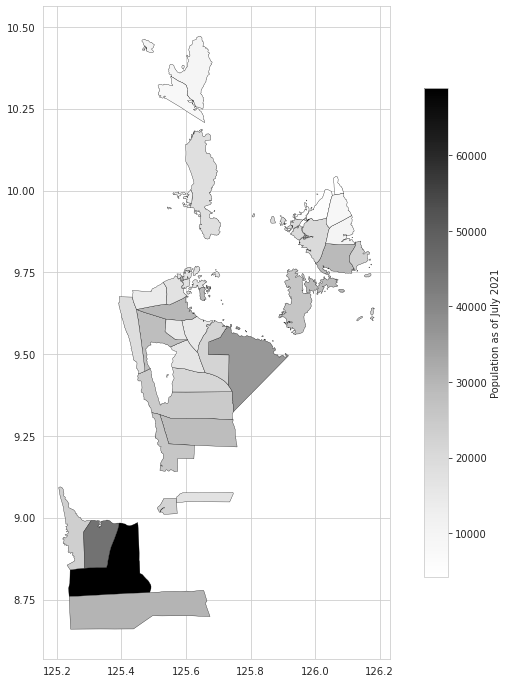

In [181]:
caraga_ = caraga_assisted.copy()
caraga_['province'] = caraga_['province'].str.lower()
caraga_['city_municipality'] = caraga_['city_municipality'].str.lower()

caraga_shp = pd.merge(caraga_, ph_shp[['name_1','name_2','geom']],
                        left_on=['province', 'city_municipality'],
                        right_on=['name_1','name_2'])
caraga_shp.drop(columns=['name_1','name_2'], inplace=True)
# display(caraga_shp)

# initialize caraga_shp dataframe as a GeoDataFrame
caraga_shp = gpd.GeoDataFrame(data=caraga_shp, geometry='geom')

# plot the density of population in CARAGA region
fig, ax = plt.subplots(figsize=(12,12))

caraga_shp.plot(ax=ax, column='population',
                cmap='Greys',
                edgecolor='black',
                linewidth=.3,
                alpha=1,
                legend=True,
                legend_kwds={'label': "Population as of July 2021",
                             'orientation': "vertical", 'shrink': 0.75})
plt.show()

fl.fig_caption("Provinces of Agusan del Norte, "
               "Dinagat Islands and Surigao de Norte",
              "Population Data of CARAGA Region")

The population data of CARAGA is visualized above as a map where the darker areas signify higher concentration of people. By this time, the province of Agusan del Sur has been excluded given its sparse transation-item database. Therefore, the population visualized above are of the cities/municipalities of Surigao del Norte, Agusan del Norte, and Dinagat Islands only.

[ref]: #top
[Back to Table of Contents][ref]

<a name="clus_freq"></a>
<h2 style=" color: #045a63">Data Analysis</h2>

***
The third step in our methodology is clustering implementation and frequent itemset analysis. In this step, we implement clustering algorithms to group similar data points together. We also identify frequent patterns or itemsets in the data to gain insights into the data. By analyzing the results of the clustering and frequent itemset analysis, we can identify any underlying patterns or trends in the data.

<a name="clus"></a>
<h4 style=" color: #045a63">Clustering Implementation</h4>

***
Before we perform clustering, we are going to implement singular vector decomposition to reduce the number of components. 

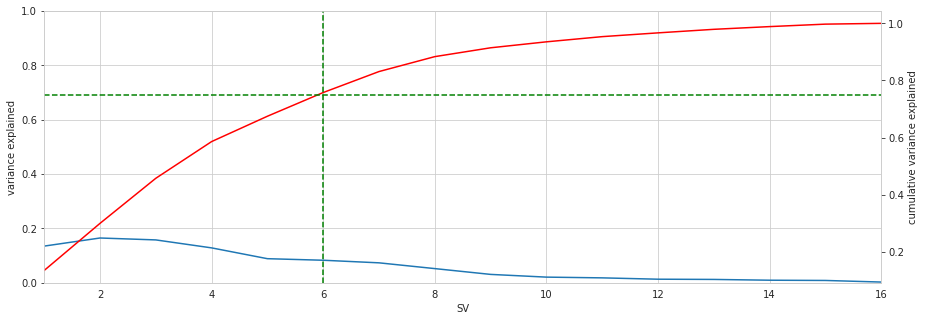

In [182]:
df_testclusters = df_pv1.copy()
df_testclusters[df_testclusters > 0] = 1

merged_all = (
    TruncatedSVD(n_components=df_testclusters.shape[1], random_state=1337)
)
df_merged_all = merged_all.fit_transform(df_testclusters)
nssd = merged_all.explained_variance_ratio_

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(range(1, len(nssd)+1), nssd, '-', label='individual')
ax.set_xlim(1, len(nssd))
ax.set_ylim(0, 1)
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')

ax = ax.twinx()
ax.plot(range(1, len(nssd)+1), nssd.cumsum(), 'r-', label='cumulative')
ax.axhline(0.75, ls='--', color='g')
ax.axvline(6, ls='--', color='g')
ax.set_ylabel('cumulative variance explained')
ax.grid(None)
plt.show()

fl.fig_caption("Scree Plot of SVD of Organization Cluster Features",
              "For this analysis, 6 components were preserved to achieve"
              " 75% explained variance, plotted on the first 2 components "
              "which together achieve a 30% explained variance.")

In [183]:
merged_svd = TruncatedSVD(n_components=6, random_state=1337)
df_merged_new = merged_svd.fit_transform(df_testclusters)

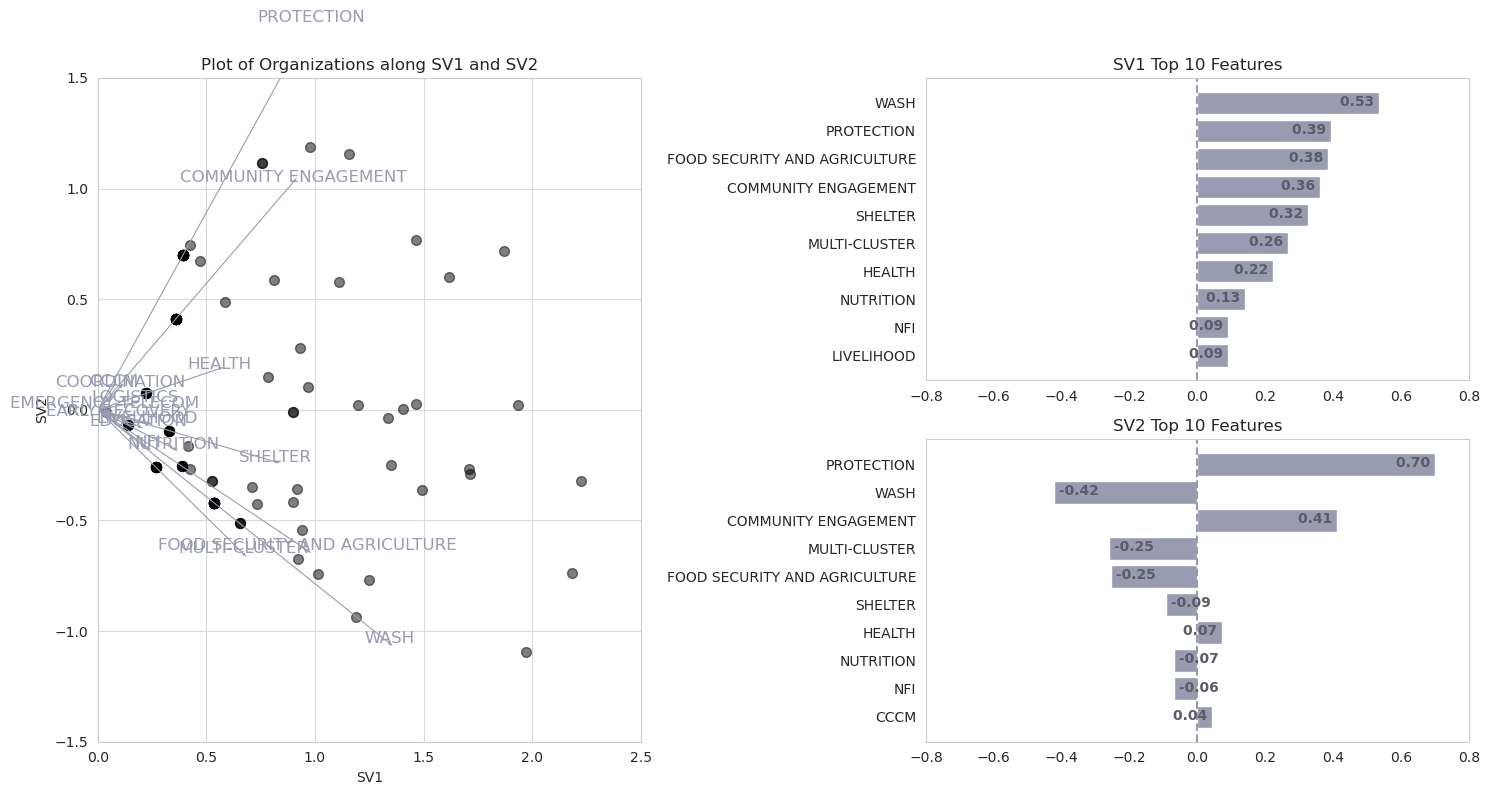

In [184]:
fig = plt.figure(figsize=(15,8), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(224)

ax1.scatter(df_merged_new[:,0], df_merged_new[:,1],
            alpha=0.5, s=50, c='black')
for feature, vec in zip(df_testclusters.columns, merged_svd.components_.T):
    ax1.arrow(0, 0, 2.5*vec[0], 2.5*vec[1],
              width=0.005, ec='none', fc='#999BB0')
    ax1.text(2.5*vec[0], 2.5*vec[1], feature,
             ha='center', color='#999BB0', size=12)
ax1.set_xlim([0, 2.5])
ax1.set_ylim([-1.5, 1.5])
ax1.set_xlabel('SV1')
ax1.set_ylabel('SV2')
ax1.set_title('Plot of Organizations along SV1 and SV2')
ax1.grid(color='xkcd:light grey')

for i, (a, title) in enumerate(zip([ax2, ax3],
                                   ['Intensity of Operations',
                                    'Lasting Effect of Activity'])):
    order = np.argsort(np.abs(merged_svd.components_.T[:, i]))[-10:]
    a.barh([df_testclusters.columns[o] for o in order],
           merged_svd.components_.T[order, i], color='#999BB0')
    for n, v in enumerate(merged_svd.components_.T[order, i]):
        if v > 0:
            a.text(v, n-0.1, str(v)[0:4]+' ', color='#5B5C68',
                   fontweight='bold', ha='right')
        if v < 0:
            a.text(v, n-0.1, ' '+str(v)[0:5], color='#5B5C68',
                   fontweight='bold', ha='left')
    a.set_title(f'SV{i+1} Top 10 Features')
    a.set_xlim([-0.8, 0.8])
    a.grid(None)
    a.axvline(0, ls='--', c='#999BB0')
fig.tight_layout()

plt.show()

fl.fig_caption("Plot and Features of the Top 2 SVD" 
               "Components of Organizations",
               "Based on the plot, Wash and Community Engagement/Protection"
               "are most opposite to each other. There are noticeable"
               "separations between clumps of organizations, suggesting"
               " room for clustering. Further interpretations and insights"
               "on the intuition or possible meaning behind the"
               " relationships of the singular vector components and"
               " organization features will be discussed after "
               "full implementation.")

This dimensionally reduced data will be clustered using representative-based, density-based, and hierarchal clustering methods to achieve a desirable grouping. 

<h4 style=" color: #045a63">Representative-based Clustering</h4>
For representative-based clustering, `K-Means` was implemented on the clustering dataset. The number of clusters, `k`, was tuned from the values of 2 to 11 to see what number of clusters would be best. This was evaluated using the following internal metrics: SSE, CH, silhouette coefficient, DB, and gap statistic.

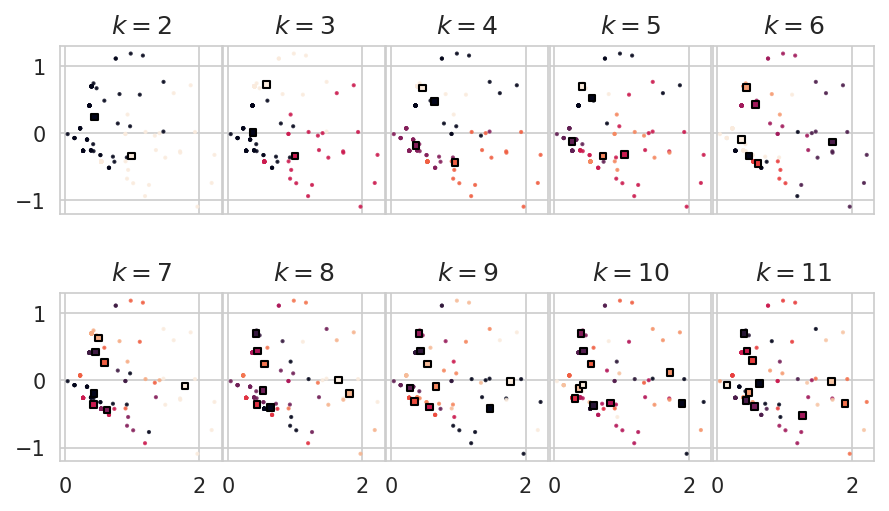

In [185]:
res_merged = (
    cluster_range(df_testclusters.to_numpy(),
                  KMeans(random_state=1337), 2, 11)
)

plot_clusters(df_merged_new[:, :2],
              res_merged['ys'],
              res_merged['centers'],merged_svd)
plt.show()
fl.fig_caption("Representative Clustering K-means"
               "Hyperparameter Tuning Plots",
               "Eyeballing the plots from k=2 to 11, the most separated"
               "and balanced representation of clusters can be found at k=3.")

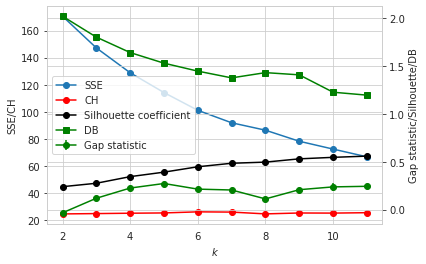

In [186]:
plot_internal(res_merged['inertias'], res_merged['chs'], res_merged['scs'],
              res_merged['dbs'], res_merged['gss'], res_merged['gssds'])
plt.show()
fl.fig_caption('Reperesentative Clustering K-means'
               'Internal Validation Scores',
               'Using the elbow method, we can see that at k=4,'
               'DB is maximized before entering a diminishing trend as'
               ' k increases. In this case, we will use k=4 in our'
               ' k-means reprsentative clustering implementation.')

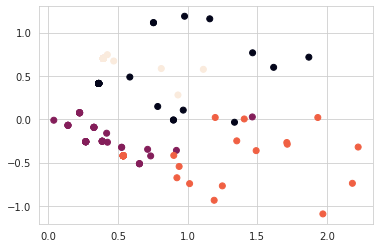

In [187]:
kmeans_merged = KMeans(n_clusters=4, random_state=1337)
y_predict_merged = kmeans_merged.fit_predict(df_testclusters)

plt.scatter(df_merged_new[:,0], df_merged_new[:,1], c=y_predict_merged)   
plt.show()
fl.fig_caption('Best Representative Clustering K-means Plot',
               'With k=4, one cluster appears to have few members,'
               'with many clusters failing to separate from each other.'
               'Given this, other clustering methods will be explored.')

<h4 style=" color: #045a63">Density-based Clustering</h4>
For density-based clustering, `OPTICS` was implemented on the clustering dataset. The hyperparameters, minimum number of samples and epsilon, were tuned using a reachability plot to achieve a good silhouette score and few noise points.

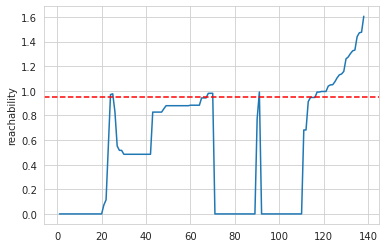

In [188]:
optics = OPTICS(min_samples=15)
optics.fit(df_merged_new)
plt.plot(optics.reachability_[optics.ordering_])
plt.ylabel('reachability')
plt.axhline(0.95, ls='--', c='r')
plt.title('')
plt.show()

fl.fig_caption('Density-based Clustering OPTICS Reachability Plot',
               'This plot depicts the possible clusters and'
               'residual noise that might be created at a given level'
               ' of reachability (epsilon) where minimum samples = 15.'
               ' In this case, epsilon will be 0.95 to create 4 clusters'
               ' with around 20+ uncaptured noise points.')

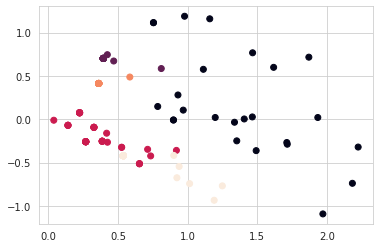

Number of clusters: 4
Number of noise points: 25
Number of points: 139
Silhouette score: 0.4953800238828189


In [189]:
cluster_labels = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=0.95
)
plt.scatter(df_merged_new[:,0], df_merged_new[:,1], c=cluster_labels)
plt.show()

print('Number of clusters:', cluster_labels.max()+1)
print('Number of noise points:', (cluster_labels==-1).sum())
print('Number of points:', len(cluster_labels))
print('Silhouette score:', silhouette_score(df_merged_new, cluster_labels))

fl.fig_caption('Best Density-based Clustering OPTICS Plot',
               'The final OPTICS clustering results in 4 clusters, just like'
               ' k-means, with 25 noise points. The silhouette score is close'
               ' to an ideal 0.5, but is also not balanced. With too many'
               ' uncaptured noise points, we will explore hierarchichal'
               ' methods to find a more ideal clustering.')

<h4 style=" color: #045a63">Hierarchical Clustering</h4>
For hierarchichal clustering, the following linkage methods were explored: `single`, `complete`, `average`, `ward`, and evaluated through dendrograms. Ultimately we found that the best linkage method was `ward linkage` implemented on the clustering dataset.

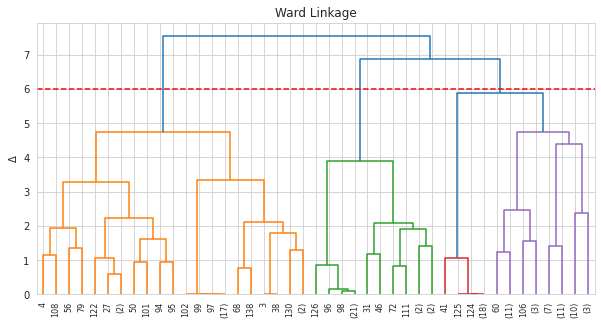

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
Z = linkage(df_merged_new, method='ward')
dn = dendrogram(Z, truncate_mode='level', p=5, ax=ax)
ax.axhline(6, ls='--', c='r')
ax.set_ylabel(r'$\Delta$')
ax.set_title('Ward Linkage')
plt.show()

fl.fig_caption('Hierarchichal Clustering Ward Linkage Dendrogram',
               'Based on the dendrogram of ward linkage, at a threshold of'
               ' 6, the clusters can create 3 balanced clusters with a '
               'relatively high merging cost.')

<h3 style=" color: #045a63">Final Clustering</h3>

Out of all the methods explored, `Hierarchichal Clustering` was found to provide the most balanced, separated, and parsimonious resulting clusters.

In [191]:
Z = linkage(df_merged_new, method='ward')
y_predict_clusters = fcluster(Z, t=6, criterion='distance')

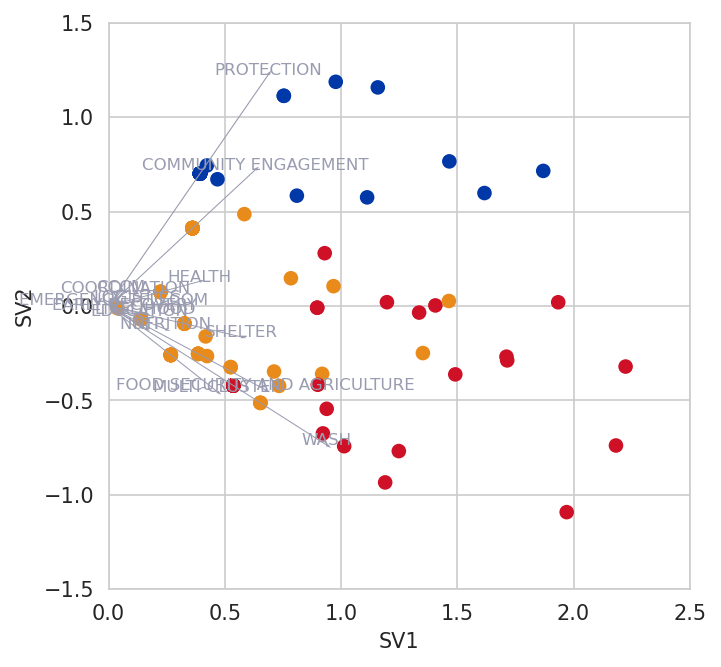

In [192]:
fig, ax = plt.subplots(1, 1, dpi=150, figsize=(5, 5))
ax.scatter(df_merged_new[:,0], df_merged_new[:,1],
           c=[{2:'#0038A8', 1:'#CE1126', 3:'#E98B1B'}[c]
              for c in y_predict_clusters])
for feature, vec in zip(df_testclusters.columns, merged_svd.components_.T):
    ax.arrow(0, 0, 1.75*vec[0], 1.75*vec[1],
             width=0.005, ec='none', fc='#999BB0')
    ax.text(1.75*vec[0], 1.75*vec[1], feature,
            ha='center', color='#999BB0', size=8)
    
ax.set_xlim([0, 2.5])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('SV1')
ax.set_ylabel('SV2')
plt.show()

fl.fig_caption('Final Clustering Plot (Hierarchichal Clustering)',
               'Using ward linkage at a threshold=6, three balanced clusters'
               ' can be isolated with some overlap.')

The results and insights will be further discussed and interpreted on the next sections. This clustering will also serve as a reference for recommendations and conclusions.

[ref]: #top
[Back to Table of Contents][ref]

<a name="freq"></a>
<h4 style=" color: #045a63">Frequent Itemset Mining Implementation</h4>

***

For the implementation, we have to perform each step indicated below to understand how we are planning to give assistance to the disaster and risk management authorities while leveraging on frequent itemsent mining analysis.

#### Step 1: Get the transaction-item database of one time period

In [193]:
# Extract the transactions and items during Week 2
df_wk2 = df_tmp_grp.copy().set_index('ACTIVITY_START_DATE')
df_wk2 = df_wk2.loc[['2021-12-19'], :]

fl.table_caption("Transaction-Item Database DataFrame",
              "2-week period that ends at December 19, 2021")
display(HTML(df_wk2.head(5).to_html(index=True)))

,PROVINCE,CITY_MUNICIPALITY,CLUSTER
ACTIVITY_START_DATE,,,
2021-12-19,AGUSAN DEL NORTE,"AGUSAN DEL NORTE, JABONGA","{HEALTH, FOOD SECURITY AND AGRICULTURE, WASH}"
2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, LIBJO (ALBOR)",{CCCM}
2021-12-19,DINAGAT ISLANDS,"DINAGAT ISLANDS, SAN JOSE (CAPITAL)",{CCCM}
2021-12-19,SURIGAO DEL NORTE,"SURIGAO DEL NORTE, BURGOS",{CCCM}
2021-12-19,SURIGAO DEL NORTE,"SURIGAO DEL NORTE, DAPA",{CCCM}


Displayed above are the first 5 rows of the transaction-item database for the 2-week period that ends at December 19, 2021.

#### Step 2: Get crucial aid through FIM of the 2-week period database

In [194]:
# get the most frequent itemsets in Week 2
fim_data = df_wk2['CLUSTER'].to_numpy()
freq_itm = fim.apriori(fim_data, supp=-2, target='s', report='a', zmin=1)
freq_itm_srtd = sorted(freq_itm, key=lambda x: -x[1])
# print(freq_itm_srtd)

# Get the top most frequent itemsets
top3_freq_itm = freq_itm_srtd[:5]
freq = (
    pd.DataFrame(top3_freq_itm, columns=['most_freq_relief',
                                         'transaction_cnt'])
)

fl.table_caption("Most Frequent Relief Operations DataFrame",
              "Transaction count of each operations shows the "
                "critical impact of that operations.")
display(HTML(freq.to_html(index=False)))

most_freq_relief,transaction_cnt
"(CCCM,)",12
"(HEALTH, FOOD SECURITY AND AGRICULTURE)",2
"(HEALTH,)",2
"(FOOD SECURITY AND AGRICULTURE,)",2


The top most frequent itemsets generated by our FIM algorithm serve as an indication that the listed set of relief activities are **CRUCIAL** or deemed by organizations as vital for affected city/municipalities and barangays to recover during the given 2-week period.

#### Step 3: Determine provinces by crucial aid received

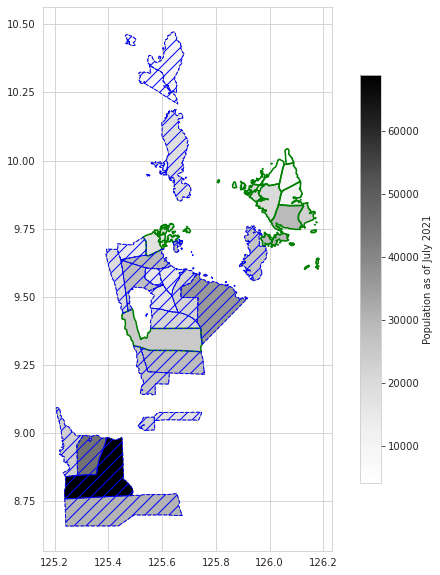

In [195]:
df_wk2['SERVICE'] = (df_wk2['CLUSTER']
                     .apply(lambda x: sum([len(set(itm[0]).intersection(x))
                                           for itm in top3_freq_itm])))
# display(df_wk2)

split_ = split_to_cityprov(df_wk2.reset_index(),
                                      'CITY_MUNICIPALITY',
                                      f'{2}W')
df_overview = caraga_shp.merge(split_, how='left',
                               left_on=list(caraga_shp.columns[:2]),
                               right_on=[f'{2}W_prov', f'{2}W_city'])
df_overview.drop(columns=[f'{2}W_prov',f'{2}W_city',
                          'PROVINCE','CITY_MUNICIPALITY'], inplace=True)

# Extract aided cities/municipalities
df_aided = df_overview.query('SERVICE.notna()')

# Extract unaided cities/municipalities
df_n_aided = df_overview.query('SERVICE.isna()')

fig, ax = plt.subplots(figsize=(10,10))

# Plot the population map of CARAGA
plot_caraga_shp(ax, caraga_shp)

# Plot the aided provinces over the population map of CARAGA
df_aided.plot(ax=ax,
                facecolor='none',
                edgecolor='green',
                linewidth=1.5,
                alpha=1)
# Plot the underserved provinces over the population map of CARAGA
df_n_aided.plot(ax=ax,
                facecolor='none',
                edgecolor='blue',
                linewidth=1, linestyle='--',
                hatch='//', alpha=1)
plt.show()

fl.fig_caption('Cities/municipalities by crucial aid received at Week 2',
               'Comparison of the aided and underserved areas')

The plot above indicate the following:
1. **Aided areas**. Areas with a green outline are provinces that received crucial types of aid
2. **Underserved areas**. Areas with a blue outline and filled with blue diagonal lines are provinces who have not received crucial types of aid<br>
    2.1 Underserved areas were provinces that were affected by the typhoon, but were lower in priority in terms of receiving crucial types of aid
    
We will later reduce the number of underserved areas to make a recommendation. This will be done by getting the average distance of aided provinces with underserved ones, rank them by population, and get the top 3 underserved province candidates that may need crucial aid.

#### Step 4: Recommend underserved provinces to receive crucial aid

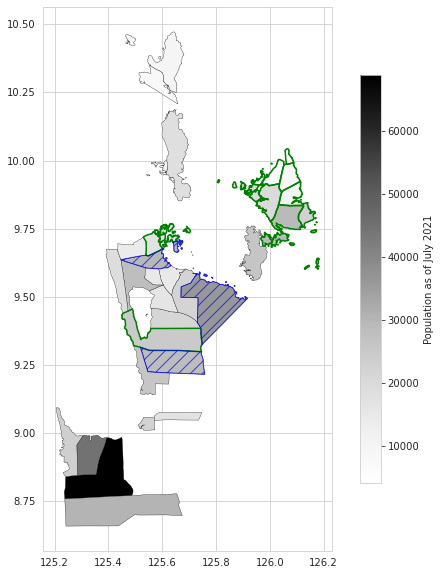

Recommended underserved cities/municipalities:
['CLAVER', 'PLACER', 'SANTIAGO']


In [196]:
# measure the distance of every aided province
# with underserved  cities/municipalities
unsrvd_res = []
for i, row in df_aided.iterrows():
    row_geom = row['geom']
    
    # distance of one aided province from all
    # underserved  cities/municipalities
    dists_unserved = (gpd.GeoSeries(df_n_aided['geom'])
                      .distance(row_geom.centroid)
                      .sort_values(ascending=True)
                      .to_frame().rename(columns={0:'distance'}))
    
    # Get nearest 5 underserved  cities/municipalities
    nearest_unsrvd = dists_unserved.iloc[:5] 
    nrst_idx = nearest_unsrvd.index
    
    # Get the population of the nearest underserved  cities/municipalities
    pop_nrst_unsrvd = (df_n_aided.loc[nrst_idx]
                       .sort_values(by='population', ascending=False)
                       .iloc[[0]])
    pop_nrst_unsrvd = (pop_nrst_unsrvd.merge(dists_unserved,
                                             left_index=True,
                                             right_index=True))
    unsrvd_res.append(pop_nrst_unsrvd)

# Sort nearest underserved  cities/municipalities
# by largest to smallest population
unsrvd_res = pd.concat(unsrvd_res)
# Get the top 3 by nearest distance and largest population
unsrvd_res_reco = (unsrvd_res
                   .dissolve(by=['province',
                                 'city_municipality',
                                 'population'],aggfunc='mean', as_index=False)
                   .sort_values(by=['population','distance'],
                                ascending=[False,True]).iloc[:3,:])

fig, ax = plt.subplots(figsize=(10,10))

plot_caraga_shp(ax, caraga_shp)

df_aided.plot(ax=ax,
                facecolor='none',
                edgecolor='green',
                linewidth=1.5,
                alpha=1)

unsrvd_res_reco.plot(ax=ax, column='population',
                facecolor='none',
                edgecolor='blue',
                linewidth=1,
                hatch='//', alpha=0.7)
plt.show()

unsrvd_provs = [c.upper()
                for c in unsrvd_res_reco['city_municipality'].unique()]
print(f'Recommended underserved cities/municipalities:\n'
      f'{unsrvd_provs}')

fl.fig_caption('3 Recommended provinces by Week 2 for crucial aid',
               'Recommendation plot with respect to nearest and most'
               ' populous underserved provinces')

After getting the nearest and most populous underserved provinces with respect to the aided areas in this 2-week time period, we visualize them in a map. By order of importance, the cities/municipalities of Claver, Placer, and Santiago were recommended as the next provinces that may: 1) have not received crucial types of aid, or; 2) have not received enough crucial types of aid.

The above analysis and recommendation for Week 2 will be repeated for all weeks in the 1-year time period. The function below will automate the above steps and display plots for every 2 weeks highlighting areas that received crucial aid and recommending crucial aid for underserved areas.

  0%|          | 0/15 [00:00<?, ?it/s]

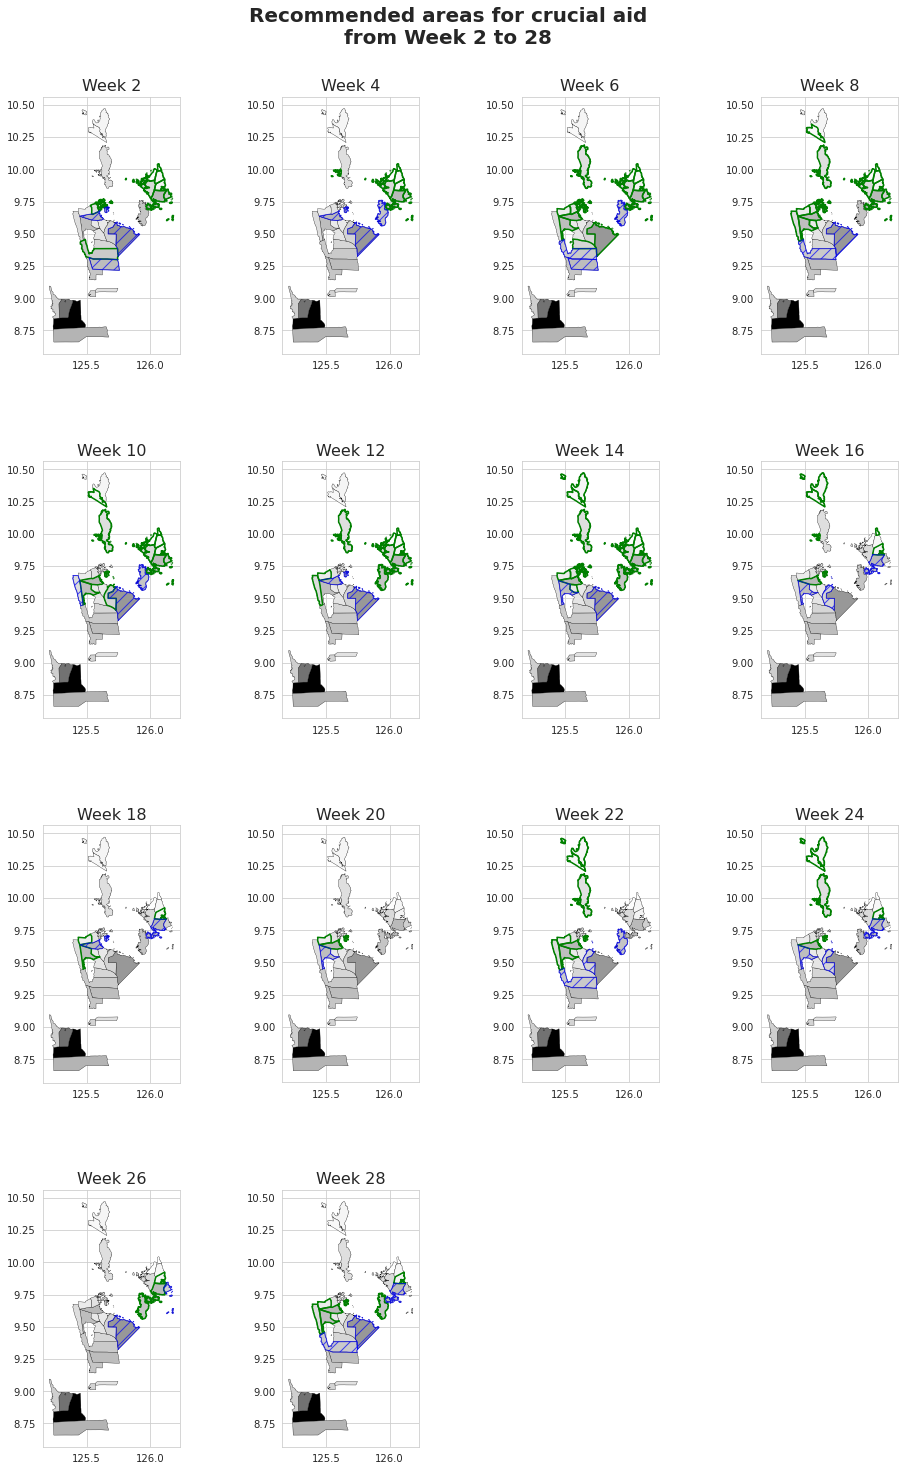

In [197]:
fim_gsa(df_tmp_grp, caraga_shp)

fl.fig_caption('Results for all 2-week time periods',
               '1 year time period plots of the previous analysis')

[ref]: #top
[Back to Table of Contents][ref]

<a name="conc"></a>
<h2 style=" color: #045a63">Conclusions and Insights</h2>

***

In this section, we present the conclusions and insights derived from our research study. Drawing upon the data and analysis presented in the previous sections, we synthesize our findings to address the research question and achieve the research objectives. We begin by summarizing the key findings and highlighting their significance.

<h4 style=" color: #045a63">Component Insights</h4>

Using the final clustering and the projection of organization features as basis for interpretation, the final axes for SV1 and SV2 were interpreted as the `Intensity of Operation` and `Lasting Effect of Activity` particular or characteristic to an organization.

Organizations high on the x-axis, or `Intensity of Operation`, will find themselves flexible enough to do many different types of activities, in other words, these are organizations that are more multi-purpose or broad in their mission and deployment to assist, rather than being specialized for a specific assistance activity, catapulted by more than one activity type vector due to the broad array of activities it is capable of.

Organizations high on the y-axis, or `Lasting Effect of Activity`, are on the basis of how much an organization focuses on immediate short-term impact (wash (aka hygiene assistance) and food security/agriculture), or slow long-term impact (protection and community engagement).

<center><img src="comp_img.PNG" alt="Computer Image" width="1000" height="600"></center>


<h4 style=" color: #045a63">Cluster Insights</h4>

For clustering, on the basis of the component interpretations, the projected organization features, and the final clustering provided by ward linkage, three clusters were interpreted similar to definitions of current Disaster Readiness and Risk Reduction (DRRR) terminology, namely:

1. `Response`: Immediate emergency assistance for basic needs like hygiene (wash) and food (food security and agriculture).
2. `Recovery`: Intense efforts that rebuild the community (shelter) while still simultaneously catering to immediate basic needs (wash, food security and agriculture).
3. `Rehabilitation`: Long-term activities (community engagement, protection) meant to stabilize the affected area and return the community's operations to normal pre-disaster levels.

Response, Recovery, and Rehabilitation tend to follow a chronological order of importance of assistance over the course of a disaster with Response being first and Rehabilitation being last. As the partitions between when these activities transition from one phase to the next vary per organization, it makes sense that there is some overlap in each cluster. The most prominent features that justify the definitions of these clusters are found in the graphic below.

<center><img src="clus_img.PNG" alt="Cluster Image" width="1000" height="600"></center>

<h4 style=" color: #045a63">Frequent Itemset Analysis Insights</h4>

#### Coordinating relief operations

**Scenario**:
We are a committee that was tasked to coordinate the ingress of local and international organizations that plan to provide aid to typhoon-hit provinces in the region of CARAGA. We are currently at the 6th week of relief operations and we have data on the crucial types of aid two organizations (i.e., PRC and IOM) have provided in the past two weeks.

Using the methods illustrated above, we will be able to:
1. Request **current relief organizations** to extend their capacity to provide crucial types of aid to the closest most populous provinces that the have not served
2. Direct **new relief players** to assist or support organizations that are already on the ground by providing crucial types of aid to the closest most populous provinces that the have not been served by any organization
3. Locate for foreign relief organizations where in the Philippines are the provinces that have and have not received crucial types of aid

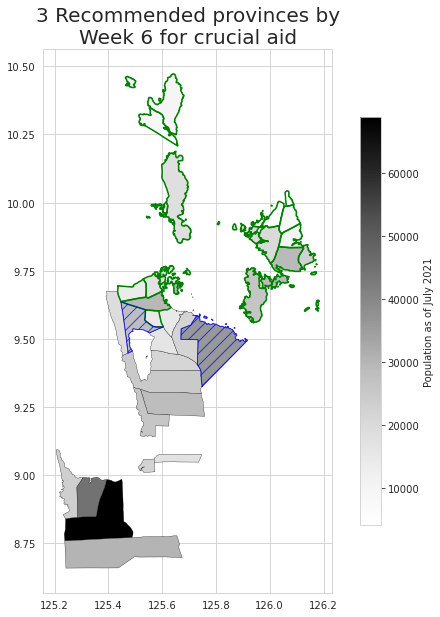

In [198]:
crucial, aided, n_aided_recoms = (
    week_fim_gsa(df_tmp_grp, caraga_shp, wk_idx=2)
)

fl.fig_caption('3 Recommended Provincesby week 6 for crucial Aid',
               'Scenario based recommendations plot')

In [199]:
fl.table_caption("6th 2-week time period DataFrame",
              "Most frequent itemsets/types at time period 6.")
display(HTML(crucial.to_html(index=False)))

most_freq_relief,transaction_cnt
"(SHELTER,)",16
"(WASH,)",10
"(CCCM,)",9
"(CCCM, SHELTER)",6
"(NFI, SHELTER)",6


The dataframe above shows the most frequent itemsets/types of aid during the 6th 2-week time period. From this information we can:
1. Advise relief organizations to provide **MORE** of the type of aid that is most crucial during this time period, namely SHELTER and WASH, to aided (green outline) and underserved areas (blue outline) in the above map
2. Reallocate excess crucial aid to the nearest and most populous underserved provinces

In [200]:
fl.table_caption("Province and Municipality DataFrame",
              "Aid count per pair of province and municipality.")
display(HTML(aided.to_html(index=False)))

province,city_municipality,AID_CNT
DINAGAT ISLANDS,DINAGAT,6.0
SURIGAO DEL NORTE,PILAR,6.0
SURIGAO DEL NORTE,SAN ISIDRO,6.0
DINAGAT ISLANDS,LORETO,5.0
SURIGAO DEL NORTE,BURGOS,5.0
SURIGAO DEL NORTE,PLACER,5.0
SURIGAO DEL NORTE,TUBOD,5.0
DINAGAT ISLANDS,CAGDIANAO,3.0
SURIGAO DEL NORTE,GENERAL LUNA,3.0
SURIGAO DEL NORTE,SISON,3.0


Given that our map lacks labels for the provinces, the dataframe above lists the names of the provinces that have received crucial types of aid.

In [201]:
r_col = ['province', 'city_municipality',
         'population', 'AID_CNT', 'distance']
n_aided_recoms = n_aided_recoms[r_col].copy()

n_aided_recoms['province'] = n_aided_recoms['province'].str.upper()
n_aided_recoms['city_municipality'] = (
    n_aided_recoms['city_municipality'].str.upper()
)


fl.table_caption("Recommeded Province and Municipality Pair",
              "with population, aid counter and distance from previous"
                " week, these are the recommmended provinces to conduct"
                " the next relief operations to.")
display(HTML(n_aided_recoms.to_html(index=False)))

province,city_municipality,population,AID_CNT,distance
SURIGAO DEL NORTE,CLAVER,36033,NaN,0.412250
SURIGAO DEL NORTE,MAINIT,28019,NaN,0.068609


This dataframe, on the other hand, shows information of the recommended provinces for crucial aid, their population, and relative average distance from the aided province.

[ref]: #top
[Back to Table of Contents][ref]

<a name="reco"></a>
<h2 style=" color: #045a63">Recommendations</h2>

***
Based on the insights obtained from the clustering and frequent itemset analysis, we suggest the following recommendations to enhance the significance and usefulness of this project for the planning and execution of future relief operations: 

1. Inclusion of additional data for more analysis:
The insights obtained from clustering and frequent itemset analysis can be further strengthened by including additional data related to the damages caused by the disaster. For example, data on the number of casualties, the extent of damage to infrastructure and buildings, and the economic losses incurred can help identify areas that require urgent attention. Additionally, analyzing data related to non-Odette affected areas can provide insights into the effectiveness of assistance strategies and behaviors. By analyzing this data, relief organizations can draw meaningful conclusions about how to allocate resources more effectively and efficiently in the future. 
<br>
<br>
2. Creation of Location strategy tool:
To ensure that relief efforts are focused on underserved areas, a location strategy tool can be developed. This tool can help organizations identify the areas that require the most assistance and allocate resources accordingly. The tool can use clustering and frequent itemset analysis to identify patterns and trends in the data, and use this information to guide relief efforts. By implementing a centralized relief operation with the help of this tool, organizations can avoid redundant activities and ensure that resources are allocated in a systematic and strategic manner. This can help make relief efforts more effective and efficient, and ensure that the most vulnerable communities receive the help they need.


[ref]: #top
[Back to Table of Contents][ref]

<a name="refe"></a>
<h2 style=" color: #045a63">References</h2>

***
In this section, you will find the references that were used to support the information presented in this study. These references include academic articles, books, reports, and other sources of information that were deemed relevant to the topic at hand. The references are listed in alphabetical order by author's last name, and follow the guidelines set out by the APA (American Psychological Association) style of referencing.


- NDRR Authors. (2018, January 24). THE KEY CONCEPTS IN DRRR. Retrieved March 9, 2023 from https://buildingabettertomorrowtoday.wordpress.com/2018/01/24/basic-concepts-and-terminologies-in-drrr/


- PhilAtlas. (n.d.). Caraga Region, Philippines: Cities and Municipalities. Retrieved March 9, 2023, from https://www.philatlas.com/mindanao/caraga.html


- UNHCR Philippines. (2022, March 2022). Typhoon Rai (Odette). Retrieved March 11, 2023, from https://www.unhcr.org/ph/typhoon-rai-odette


- ReliefWeb. (2022, January 20). NDRRMC Situational Report No. 36 re Preparedness Measures and Effects of Typhoon "Odette" (International Name: Rai). https://reliefweb.int/report/philippines/ndrrmc-situational-report-no-36-typhoon-odette-2021-january-20-2022-0800-am

<br>

[ref]: #top
[Back to Table of Contents][ref]